# Chap 3. Visualizing Network Data

A notebook giving the basics of using the igraph library in R for visualizing network data.

Based on Chapter 3 from [Statistical Analysis of Network Data with R](http://link.springer.com/book/10.1007%2F978-1-4939-0983-4).

The code from the book can be found on [github](https://github.com/kolaczyk/sand),

To run the notebook [jupyter](http://jupyter.org/) and the [IRkernel](http://irkernel.github.io/installation/) needs to be installed.

In [1]:
library(sand)
options(repr.plot.width=4, repr.plot.height=3)

Loading required package: igraph
Loading required package: igraphdata

Statistical Analysis of Network Data with R
Type in C2 (+ENTER) to start with Chapter 2.


## Graph layouts

There are a large amount of graph layout methods, so only a handful representative samples are discussed here.

We construct a 5x5x5 lattice and a network of blogs (AIDS blogs).

In [2]:
g.l <- graph.lattice(c(5, 5, 5))
data(aidsblog)
summary(aidsblog)

IGRAPH D--- 146 187 -- 


### Circular layout

Probably the simplest layout.

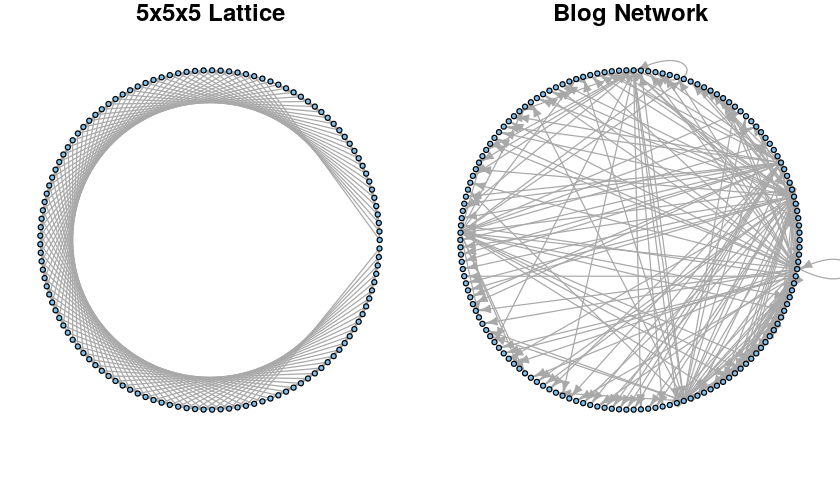

In [3]:
igraph.options(vertex.size=3, vertex.label=NA,
               edge.arrow.size=0.5)
options(repr.plot.width=7, repr.plot.height=4)
par(mfrow=c(1, 2), mar=rep(1, 4))
plot(g.l, layout=layout.circle)
title("5x5x5 Lattice")
plot(aidsblog, layout=layout.circle)
title("Blog Network")

### Spring-embedder method

Graph resemble a physical system with nodes as balls and edges as springs. Iteratively updata placement until forces converges. One example is the method of Fruchterman and Reingold.

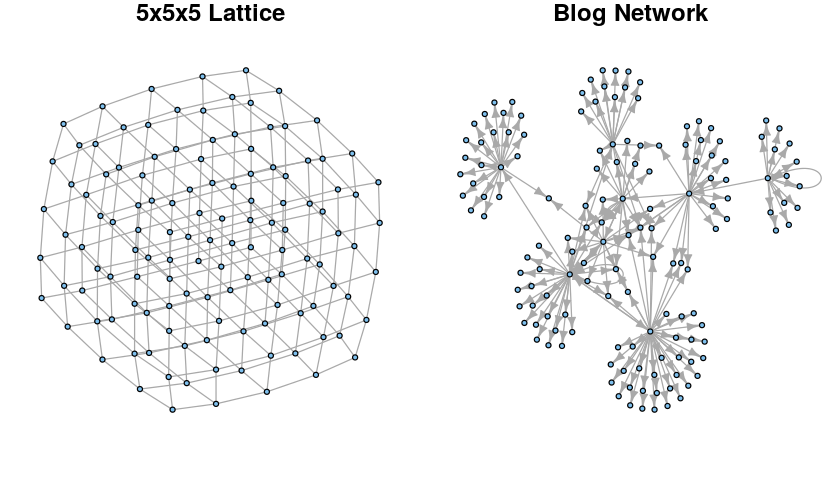

In [4]:
par(mfrow=c(1, 2), mar=rep(1, 4))
plot(g.l, layout=layout.fruchterman.reingold)
title("5x5x5 Lattice")
plot(aidsblog, layout=layout.fruchterman.reingold)
title("Blog Network")

### Energy-placement methods

Same as spring-embedder, but minimize energy of system.

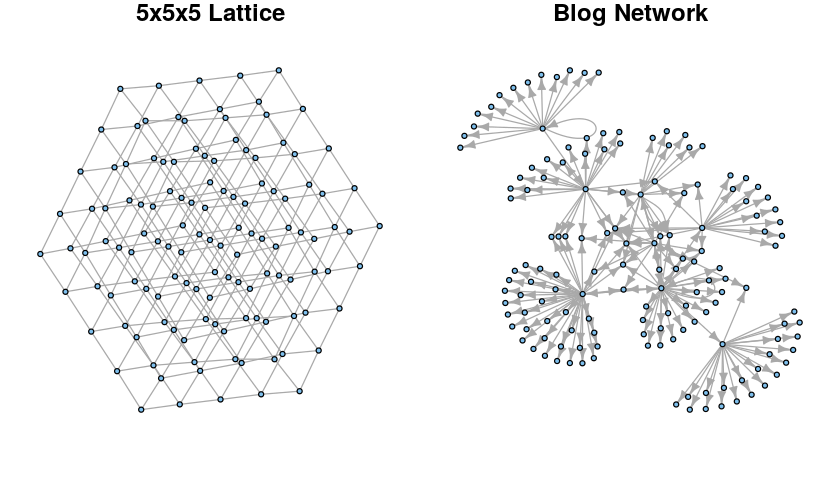

In [5]:
par(mfrow=c(1, 2), mar=rep(1, 4))
plot(g.l, layout=layout.kamada.kawai)
title("5x5x5 Lattice")
plot(aidsblog, layout=layout.kamada.kawai)
title("Blog Network")

### Tree visualizations

The layout should clearly show the characterisitcs of the graph. The raial layout below does not display a tree very well.

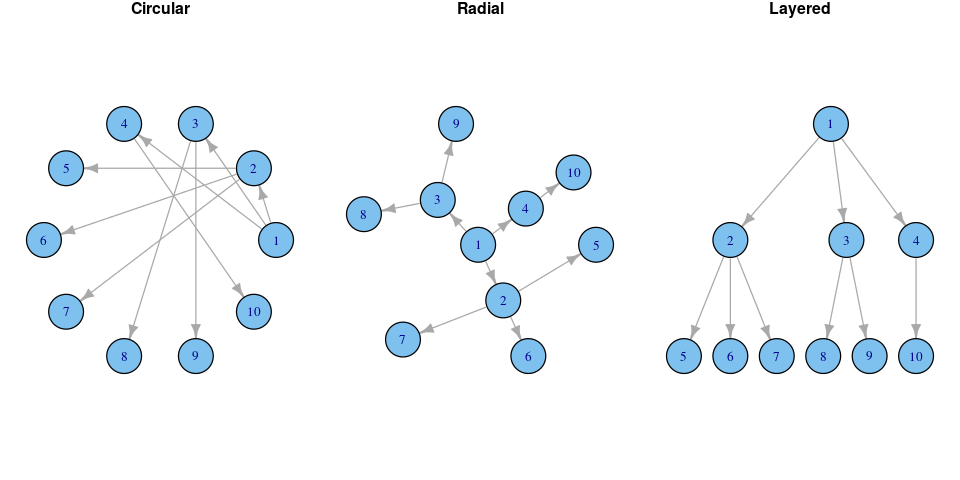

In [6]:
g.tree <- graph.formula(1-+2,1-+3,1-+4,2-+5,2-+6,2-+7,3-+8,3-+9,4-+10)
par(mfrow=c(1, 3), mar=rep(1, 4))
options(repr.plot.width=8, repr.plot.height=4)
igraph.options(vertex.size=30, edge.arrow.size=0.5, vertex.label=NULL)
plot(g.tree, layout=layout.circle)
title("Circular")
plot(g.tree, layout=layout.reingold.tilford(g.tree, circular=T))
title("Radial")
plot(g.tree, layout=layout.reingold.tilford)
title("Layered")

## Decorating Graph Layouts

While positions are important, additional information can be incorporated to show other characteristics.

The following figures is of Zachary's karate club, and can be used as a cheat sheet for decorating figures.

Note that the information could alternatively be supplied to the plotting command, thus leaving the parameters of the graph unaltered.

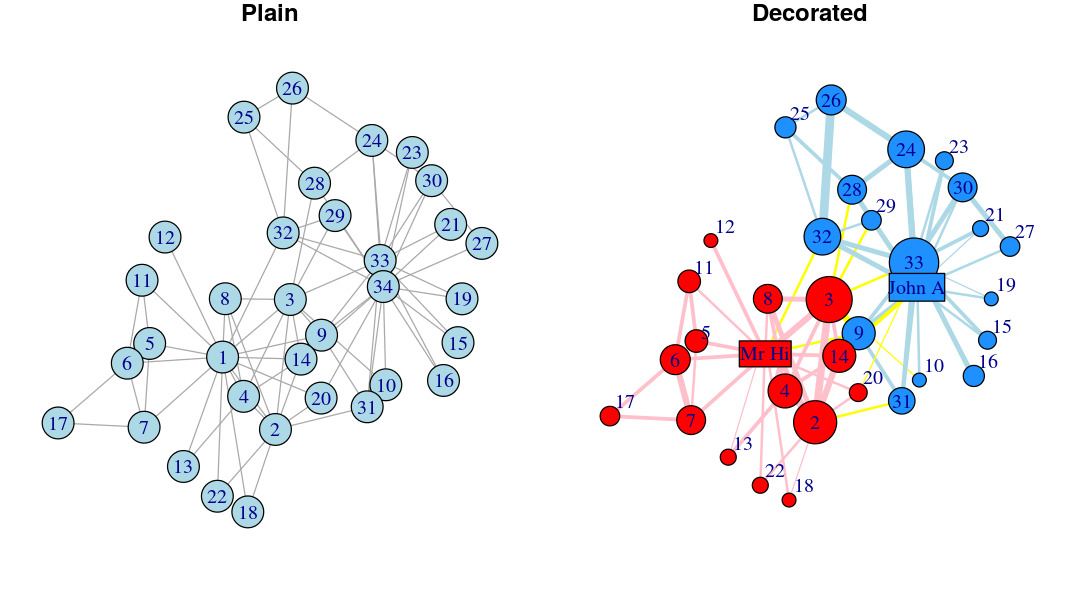

In [7]:
data(karate)
# Reproducible layout
set.seed(42)
l <- layout.kamada.kawai(karate)
# Plot undecorated first.
igraph.options(vertex.size=15)
options(repr.plot.width=9, repr.plot.height=5)
par(mfrow=c(1,2), mar=rep(1, 4))
plot(karate, layout=l, vertex.label=V(karate), vertex.color="lightblue")
title("Plain")
# Now decorate, starting with labels.
V(karate)$label <- sub("Actor ", "", V(karate)$name)
# Two leaders get shapes different from club members.
V(karate)$shape <- "circle"
V(karate)[c("Mr Hi", "John A")]$shape <- "rectangle"
# Differentiate two factions by color.
V(karate)[Faction == 1]$color <- "red"
V(karate)[Faction == 2]$color <- "dodgerblue"
# Vertex area proportional to vertex strength
# (i.e., total weight of incident edges).
V(karate)$size <- 4*sqrt(graph.strength(karate))
V(karate)$size2 <- V(karate)$size * .5
# Weight edges by number of common activities
E(karate)$width <- E(karate)$weight
# Color edges by within/between faction.
F1 <- V(karate)[Faction==1]
F2 <- V(karate)[Faction==2]
E(karate)[ F1 %--% F1 ]$color <- "pink"
E(karate)[ F2 %--% F2 ]$color <- "lightblue"
E(karate)[ F1 %--% F2 ]$color <- "yellow"
# Offset vertex labels for smaller points (default=0).
V(karate)$label.dist <- ifelse(V(karate)$size >= 12, 0, 0.9)
# Plot decorated graph, using same layout.
plot(karate, layout=l)
title("Decorated")

## Visualizing large networks

The methods discusses so far will be rather messy for larger networks. 